## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file



## Import Statements

In [147]:
import pandas
import matplotlib.pyplot as plt

## Data Exploration

In [375]:
df = pandas.read_csv('QueryResults .csv', names=['DATE', 'TAG', 'POSTS'], header=0)
df

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,c,83
3,2008-08-01 00:00:00,c#,505
4,2008-08-01 00:00:00,c++,164
...,...,...,...
2421,2023-02-01 00:00:00,php,2887
2422,2023-02-01 00:00:00,python,17386
2423,2023-02-01 00:00:00,r,3921
2424,2023-02-01 00:00:00,ruby,349


**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [326]:
df.head()

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,c,83
3,2008-08-01 00:00:00,c#,505
4,2008-08-01 00:00:00,c++,164


In [327]:
df.tail()

,DATE,TAG,POSTS
2421,2023-02-01 00:00:00,php,2887
2422,2023-02-01 00:00:00,python,17386
2423,2023-02-01 00:00:00,r,3921
2424,2023-02-01 00:00:00,ruby,349
2425,2023-02-01 00:00:00,swift,1431


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [328]:
df.shape

(2426, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [329]:
df.count()

DATE     2426
TAG      2426
POSTS    2426
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [349]:
total_posts_for_each_language = df.groupby('TAG').sum()['POSTS']
print(total_posts_for_each_language)

max_id = total_posts_for_each_language.idxmax()
max_id, total_posts_for_each_language.loc[max_id]

TAG
assembly        42312
c              393506
c#            1582392
c++            788963
delphi          50593
go              67813
java          1887837
javascript    2476731
perl            67521
php           1455172
python        2108122
r              482396
ruby           227396
swift          324807
Name: POSTS, dtype: int64


('javascript', 2476731)

Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.
How many months of data exist per language? Which language had the fewest months with an entry? 


In [356]:
total_entries = df.groupby('TAG').count()['DATE']
print(total_entries)
min_appear_id = total_entries.idxmin()
print(min_appear_id, total_entries[min_appear_id])

TAG
assembly      175
c             175
c#            176
c++           175
delphi        175
go            160
java          175
javascript    175
perl          175
php           175
python        175
r             173
ruby          175
swift         167
Name: DATE, dtype: int64
go 160


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [377]:
# df['DATE'] = df['DATE'].str.split(" ", expand=True)[0]
# df

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,83
3,2008-08-01,c#,505
4,2008-08-01,c++,164
...,...,...,...
2421,2023-02-01,php,2887
2422,2023-02-01,python,17386
2423,2023-02-01,r,3921
2424,2023-02-01,ruby,349


In [378]:
df['DATE'] = pandas.to_datetime(df['DATE'])
df

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,83
3,2008-08-01,c#,505
4,2008-08-01,c++,164
...,...,...,...
2421,2023-02-01,php,2887
2422,2023-02-01,python,17386
2423,2023-02-01,r,3921
2424,2023-02-01,ruby,349


## Data Manipulation



In [404]:
reshaped = df.pivot(index="TAG", columns="DATE", values="POSTS")
reshaped.fillna(0, inplace=True)
reshaped

DATE,2008-07-01,2008-08-01,2008-09-01,2008-10-01,2008-11-01,2008-12-01,2009-01-01,2009-02-01,2009-03-01,2009-04-01,...,2022-05-01,2022-06-01,2022-07-01,2022-08-01,2022-09-01,2022-10-01,2022-11-01,2022-12-01,2023-01-01,2023-02-01
TAG,,,,,,,,,,,,,,,,,,,,,
assembly,0.0,8.0,28.0,16.0,16.0,17.0,22.0,36.0,24.0,50.0,...,285.0,247.0,209.0,175.0,191.0,242.0,289.0,284.0,241.0,203.0
c,0.0,83.0,319.0,302.0,258.0,188.0,318.0,331.0,430.0,456.0,...,1899.0,1650.0,1481.0,1502.0,1642.0,2004.0,2185.0,1866.0,1519.0,1382.0
c#,3.0,505.0,1642.0,1988.0,1730.0,1595.0,2375.0,2598.0,3157.0,3304.0,...,6228.0,6031.0,5939.0,6310.0,5703.0,5797.0,6050.0,5348.0,5408.0,5127.0
c++,0.0,164.0,754.0,807.0,734.0,631.0,850.0,842.0,1048.0,1018.0,...,3841.0,3370.0,3248.0,3232.0,3078.0,3199.0,3308.0,2868.0,2685.0,2487.0
delphi,0.0,14.0,104.0,112.0,141.0,134.0,164.0,167.0,161.0,185.0,...,129.0,124.0,127.0,133.0,148.0,153.0,116.0,86.0,114.0,140.0
go,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,670.0,731.0,740.0,851.0,841.0,738.0,751.0,633.0,740.0,714.0
java,0.0,222.0,1129.0,1149.0,956.0,826.0,1149.0,1203.0,1430.0,1529.0,...,7793.0,6988.0,6577.0,6503.0,6217.0,6481.0,6802.0,5995.0,5813.0,5692.0
javascript,0.0,163.0,634.0,722.0,580.0,625.0,790.0,945.0,1007.0,1047.0,...,15926.0,15086.0,15125.0,15513.0,14208.0,14066.0,14367.0,12578.0,12317.0,11285.0
perl,0.0,28.0,130.0,128.0,97.0,133.0,148.0,164.0,137.0,161.0,...,94.0,124.0,130.0,117.0,82.0,82.0,110.0,94.0,76.0,87.0


In [390]:
reshaped_df = df.pivot(index='DATE', columns="TAG", values="POSTS")
reshaped_df


TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,505.0,164.0,14.0,NaN,222.0,163.0,28.0,158.0,120.0,NaN,70.0,NaN
2008-09-01,28.0,319.0,1642.0,754.0,104.0,NaN,1129.0,634.0,130.0,476.0,536.0,6.0,287.0,NaN
2008-10-01,16.0,302.0,1988.0,807.0,112.0,NaN,1149.0,722.0,128.0,610.0,506.0,NaN,247.0,NaN
2008-11-01,16.0,258.0,1730.0,734.0,141.0,NaN,956.0,580.0,97.0,500.0,450.0,1.0,158.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-01,242.0,2004.0,5797.0,3199.0,153.0,738.0,6481.0,14066.0,82.0,3365.0,22043.0,4530.0,436.0,1623.0
2022-11-01,289.0,2185.0,6050.0,3308.0,116.0,751.0,6802.0,14367.0,110.0,3366.0,22908.0,4630.0,466.0,1678.0
2022-12-01,284.0,1866.0,5348.0,2868.0,86.0,633.0,5995.0,12578.0,94.0,2903.0,19367.0,3686.0,397.0,1469.0


**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [109]:
reshaped_df.shape

(176, 14)

In [114]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,505.0,164.0,14.0,NaN,222.0,163.0,28.0,158.0,120.0,NaN,70.0,NaN
2008-09-01,28.0,319.0,1642.0,754.0,104.0,NaN,1129.0,634.0,130.0,476.0,536.0,6.0,287.0,NaN
2008-10-01,16.0,302.0,1988.0,807.0,112.0,NaN,1149.0,722.0,128.0,610.0,506.0,NaN,247.0,NaN
2008-11-01,16.0,258.0,1730.0,734.0,141.0,NaN,956.0,580.0,97.0,500.0,450.0,1.0,158.0,NaN


In [113]:
reshaped_df.tail()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2022-10-01,242.0,2004.0,5797.0,3199.0,153.0,738.0,6481.0,14066.0,82.0,3365.0,22043.0,4530.0,436.0,1623.0
2022-11-01,289.0,2185.0,6050.0,3308.0,116.0,751.0,6802.0,14367.0,110.0,3366.0,22908.0,4630.0,466.0,1678.0
2022-12-01,284.0,1866.0,5348.0,2868.0,86.0,633.0,5995.0,12578.0,94.0,2903.0,19367.0,3686.0,397.0,1469.0
2023-01-01,241.0,1519.0,5408.0,2685.0,114.0,740.0,5813.0,12317.0,76.0,3099.0,18132.0,3754.0,375.0,1456.0
2023-02-01,203.0,1382.0,5127.0,2487.0,140.0,714.0,5692.0,11285.0,87.0,2887.0,17386.0,3921.0,349.0,1431.0


In [125]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [141]:
reshaped_df.count()

TAG
assembly      176
c             176
c#            176
c++           176
delphi        176
go            176
java          176
javascript    176
perl          176
php           176
python        176
r             176
ruby          176
swift         176
dtype: int64

In [142]:
# reshaped_df = reshaped_df.fillna(0)
reshaped_df.fillna(0, inplace=True)
reshaped_df

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,83.0,505.0,164.0,14.0,0.0,222.0,163.0,28.0,158.0,120.0,0.0,70.0,0.0
2008-09-01,28.0,319.0,1642.0,754.0,104.0,0.0,1129.0,634.0,130.0,476.0,536.0,6.0,287.0,0.0
2008-10-01,16.0,302.0,1988.0,807.0,112.0,0.0,1149.0,722.0,128.0,610.0,506.0,0.0,247.0,0.0
2008-11-01,16.0,258.0,1730.0,734.0,141.0,0.0,956.0,580.0,97.0,500.0,450.0,1.0,158.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-01,242.0,2004.0,5797.0,3199.0,153.0,738.0,6481.0,14066.0,82.0,3365.0,22043.0,4530.0,436.0,1623.0
2022-11-01,289.0,2185.0,6050.0,3308.0,116.0,751.0,6802.0,14367.0,110.0,3366.0,22908.0,4630.0,466.0,1678.0
2022-12-01,284.0,1866.0,5348.0,2868.0,86.0,633.0,5995.0,12578.0,94.0,2903.0,19367.0,3686.0,397.0,1469.0


In [138]:
reshaped_df.isna().values.any()

False

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

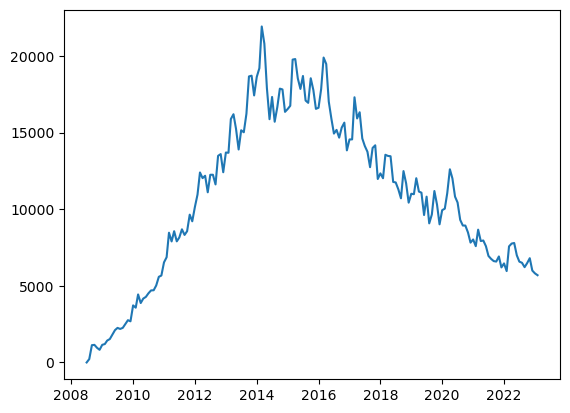

In [150]:
plt.plot(reshaped_df.index, reshaped_df['java'])


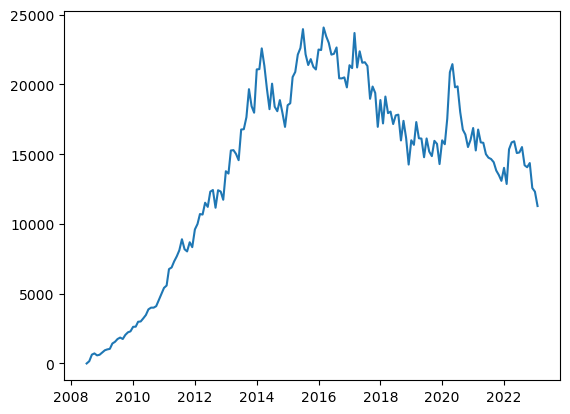

In [153]:
plt.plot(reshaped_df.index, reshaped_df['javascript'])

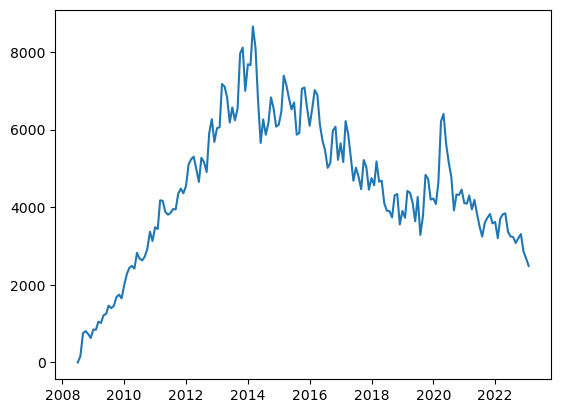

In [163]:
plt.plot(reshaped_df.index, reshaped_df['++'])

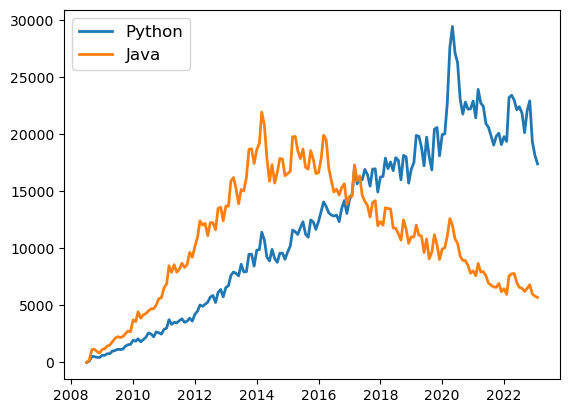

In [264]:
plt.plot(reshaped_df.index, reshaped_df['python'], linewidth=2, label="Python")
plt.legend(fontsize=12)

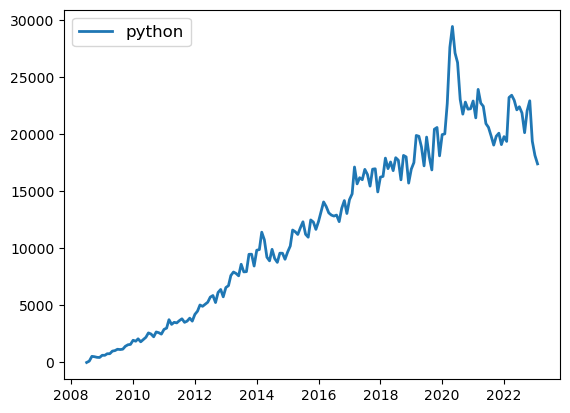

In [261]:
plt.plot(reshaped_df.index, reshaped_df['python'], linewidth=2, label=reshaped_df['python'].name)
plt.legend(fontsize=12)

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

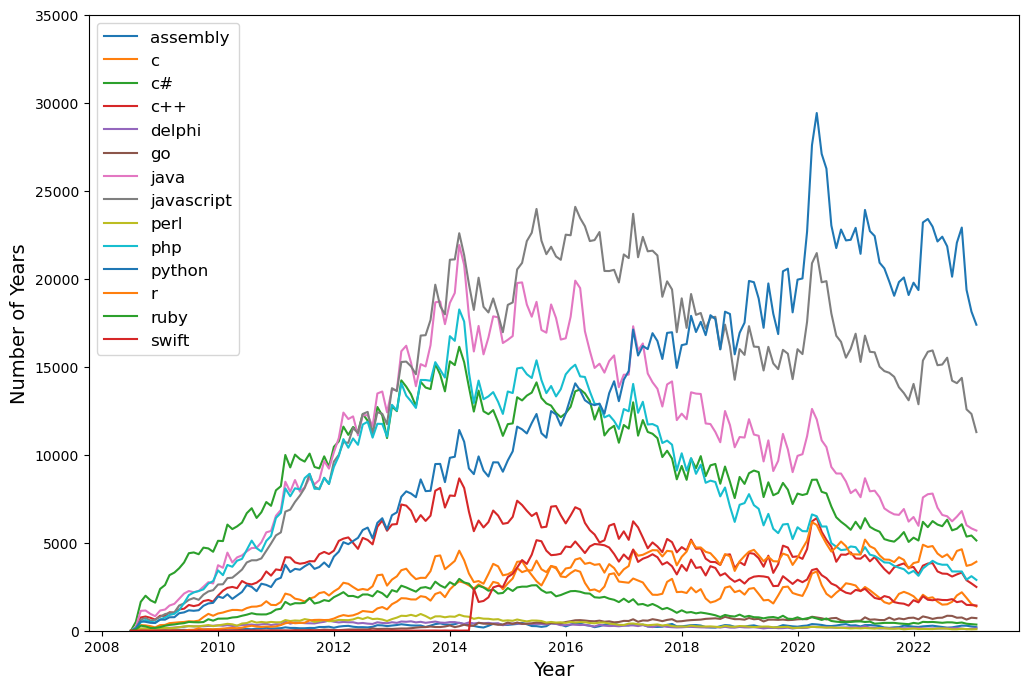

In [250]:
plt.figure(figsize=(12,8))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Years', fontsize=14)
plt.ylim(0, 35000)
plt.plot(reshaped_df)
plt.legend(reshaped_df.columns, fontsize=12)

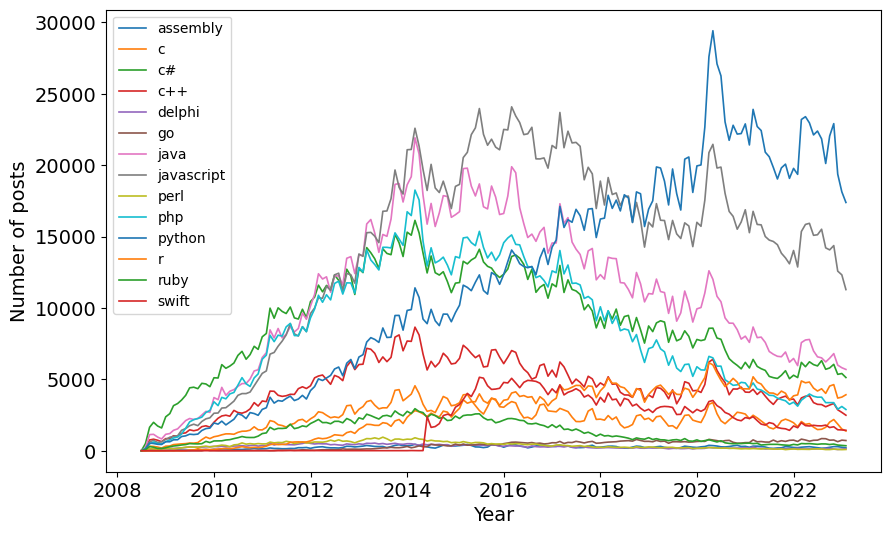

In [271]:
plt.figure(figsize=(10,6))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of posts', fontsize=14)
# plot all the languages
for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column], linewidth=1.2, label=reshaped_df[column].name)
plt.legend(fontsize=10)

Text(0, 0.5, 'Number of posts')

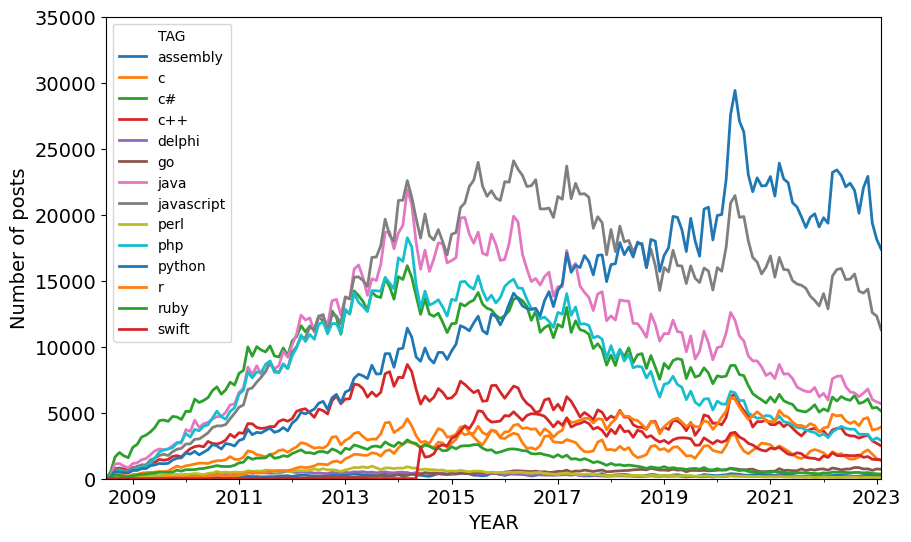

In [295]:
reshaped_df.plot(kind="line", figsize=(10,6), ylim=(0,35000), linewidth=2, fontsize=14)
plt.xlabel("YEAR", fontsize=14)
plt.ylabel("Number of posts", fontsize=14)


# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

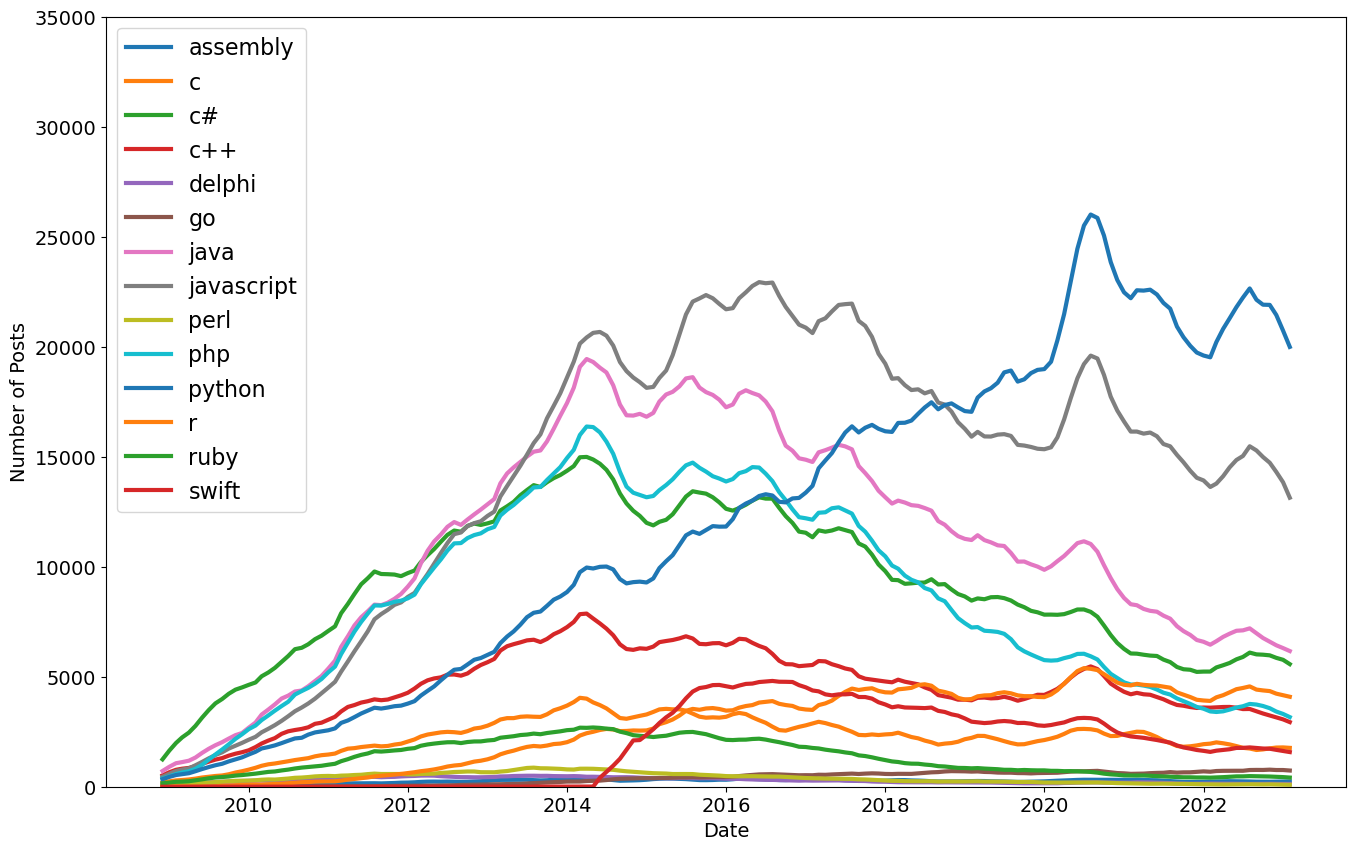

In [304]:
roll_df = reshaped_df.rolling(window=6).mean()
 
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
 
# plot the roll_df instead
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], 
             linewidth=3, label=roll_df[column].name)
 
plt.legend(fontsize=16)


Text(0, 0.5, 'Number of posts')

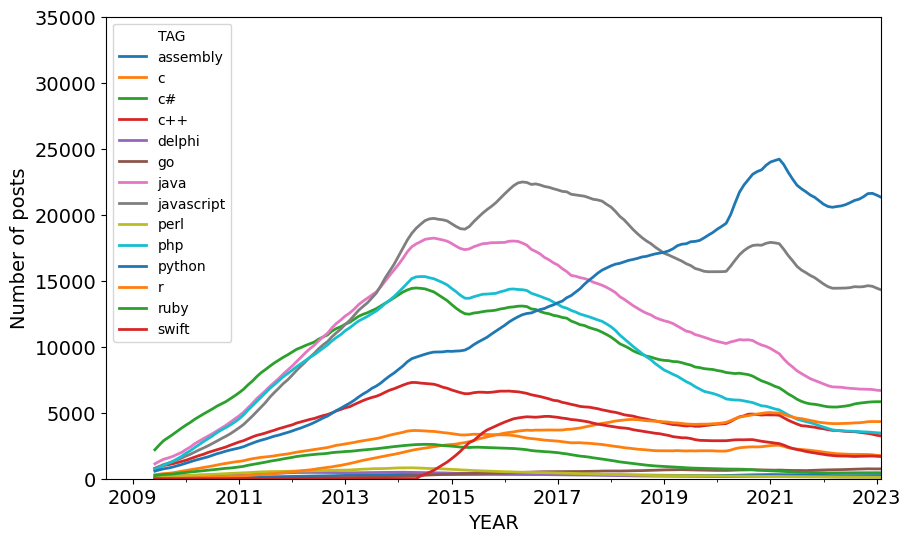

In [307]:
roll_df = reshaped_df.rolling(window=12).mean()
roll_df.plot(kind="line", figsize=(10,6), ylim=(0,35000), linewidth=2, fontsize=14)
plt.xlabel("YEAR", fontsize=14)
plt.ylabel("Number of posts", fontsize=14)
